In [1]:
import json
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [2]:
from arch import arch_model

In [3]:
with open('config.json', 'r') as file:
    config = json.load(file)

In [4]:
files_folder = config['files_folders']['processed']
research_results_folder = config['files_folders']['research_results']

# Single `fvm`s

In [4]:
file_name = 'fvm_result_2022-01-29 18-48-25.pkl'

with open(f'{research_results_folder}/{file_name}', 'rb') as file:
    fvm_res = pickle.load(file)

In [8]:
fvm_res['train'].shape

(100,)

In [9]:
fvm_res['test'].shape

(30,)

In [11]:
fvm_res['fvm_errors']

{'mse': 11.917484862124329658,
 'rmse': 3.4521710360473638701,
 'mape': 0.75935975879794273026}

# Consequent params fitting

In [74]:
file_name = 'fitting_consequent_params_result_2022-02-01 19-25-09.pkl'

with open(f'{research_results_folder}/{file_name}', 'rb') as file:
    res = pd.read_pickle(file)

In [75]:
consequent_metaparams = res['fvms'][0].local_method_parameters  # res['consequent_metaparams']
p = consequent_metaparams['p']
q = consequent_metaparams['q']

train = res['train']
test = res['test']

n_train = train.shape[0]
n_test = test.shape[0]

print(n_train, n_test)

100 30


In [76]:
train.index[0]

Timestamp('2014-01-06 00:00:00')

In [77]:
res['antecedent_params_set']

[{'centers': [-10, -2, 2, 4], 'variances': [4, 4, 4, 4], 'n_clusters': 4},
 {'centers': [-10, -2, 2, 4], 'variances': [2, 4, 4, 2], 'n_clusters': 4},
 {'centers': [-10, -2, 2, 4], 'variances': [4, 2, 2, 4], 'n_clusters': 4}]

In [78]:
res['mses']

[11.940564922908970498, 11.940564922908970498, 11.940530556948363082]

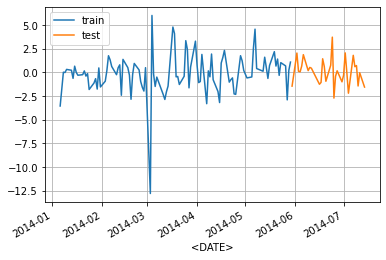

In [79]:
train.plot(label='train')
test.plot(label='test')

plt.legend()
plt.grid()
plt.show()

## Errors

In [80]:
garch_mean = 'Zero'
garch_dist = 'normal'

garch = arch_model(train,
                   mean=garch_mean,
                   vol='GARCH',
                   p=p,
                   q=q,
                   dist=garch_dist)
garch_fitted = garch.fit()

simple_garch_forecasts = garch_fitted.forecast(horizon=n_test, reindex=False).variance.iloc[0].values

mse = mean_squared_error(simple_garch_forecasts, test ** 2, squared=True)
rmse = mean_squared_error(simple_garch_forecasts, test ** 2, squared=False)
mape = mean_absolute_percentage_error(simple_garch_forecasts, test ** 2)

garch_errors = {'mse': mse, 'rmse': rmse, 'mape': mape}

Iteration:      1,   Func. Count:      5,   Neg. LLF: 224.92398317397047
Iteration:      2,   Func. Count:     13,   Neg. LLF: 219.79943267590863
Iteration:      3,   Func. Count:     18,   Neg. LLF: 217.77485889463415
Iteration:      4,   Func. Count:     23,   Neg. LLF: 217.26693911801357
Iteration:      5,   Func. Count:     27,   Neg. LLF: 217.43521932030816
Iteration:      6,   Func. Count:     32,   Neg. LLF: 217.2291730585139
Iteration:      7,   Func. Count:     36,   Neg. LLF: 217.22478250215488
Iteration:      8,   Func. Count:     40,   Neg. LLF: 217.22476113198286
Iteration:      9,   Func. Count:     43,   Neg. LLF: 217.22476113228768
Optimization terminated successfully    (Exit mode 0)
            Current function value: 217.22476113198286
            Iterations: 9
            Function evaluations: 43
            Gradient evaluations: 9


In [81]:
garch_errors

{'mse': 18.905118610268392,
 'rmse': 4.348001680113336,
 'mape': 0.7697533281327299}

In [82]:
res['mses']

[11.940564922908970498, 11.940564922908970498, 11.940530556948363082]

## Plots

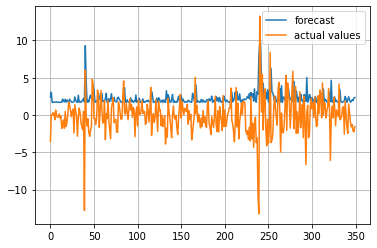

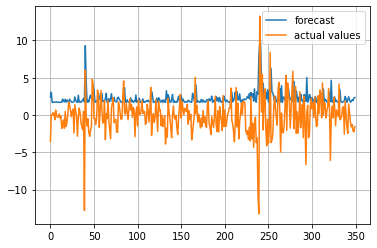

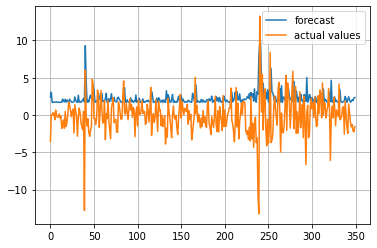

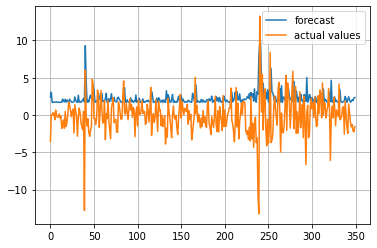

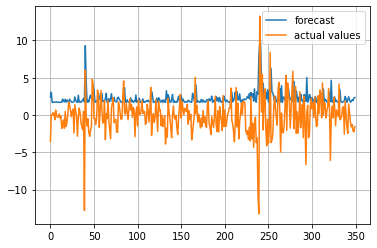

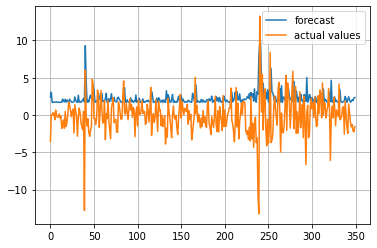

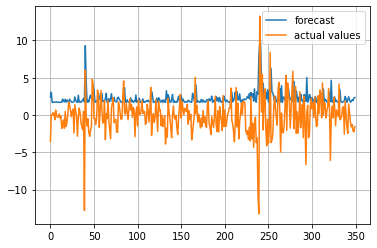

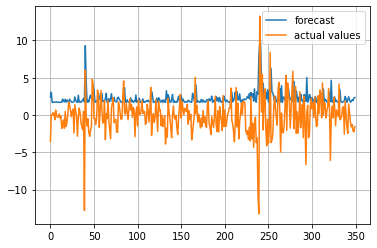

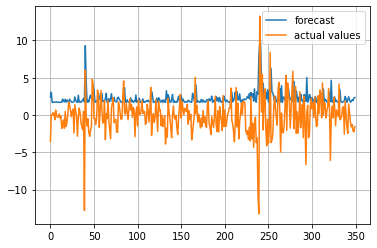

In [22]:
for fvm in res['fvms']:
    plt.plot(fvm.h[:-1] ** .5, label='forecast')
    plt.plot(fvm.train_data.values, label='actual values')

    plt.legend()
    plt.grid()
    plt.show()

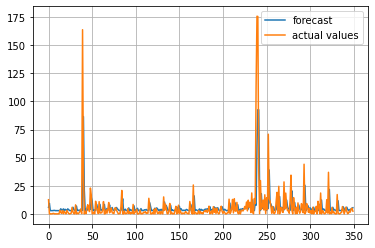

In [50]:
plt.plot(fvm.h[:-1], label='forecast')
plt.plot(input_cut.values ** 2, label='actual values')

plt.legend()
plt.grid()
plt.show()